# Исследование недвижимости в Санкт-Петербурге

Выполним предобработку данных и изучим их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

#### План работы над проектом:
* Подключение основных библиотек, изучение общей информации о датасете;
* Предобработка данных;
* Добавление новыз вспомогательных столбцов с различными параметрами;
* Исследовательский анализ данных.

#### Основные задачи проекта:
* Определить факторы, влияющие на общую (полную) стоимость квартиры;
* Узнать, как быстро продаются квартиры;
* Рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
* Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра;
* Описать, как стоимость объектов зависит от расстояния до центра города.

### 1. Откроем таблицу и изучим общую информацию о данных.

#### 1.1. Загружаем данные из файла в датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [2]:
try:
    df = pd.read_csv('C:\data/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### 1.2. Общая информация о полученном датафрейме.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### 1. 3. Построим общую гистограмму для всех столбцов таблицы.

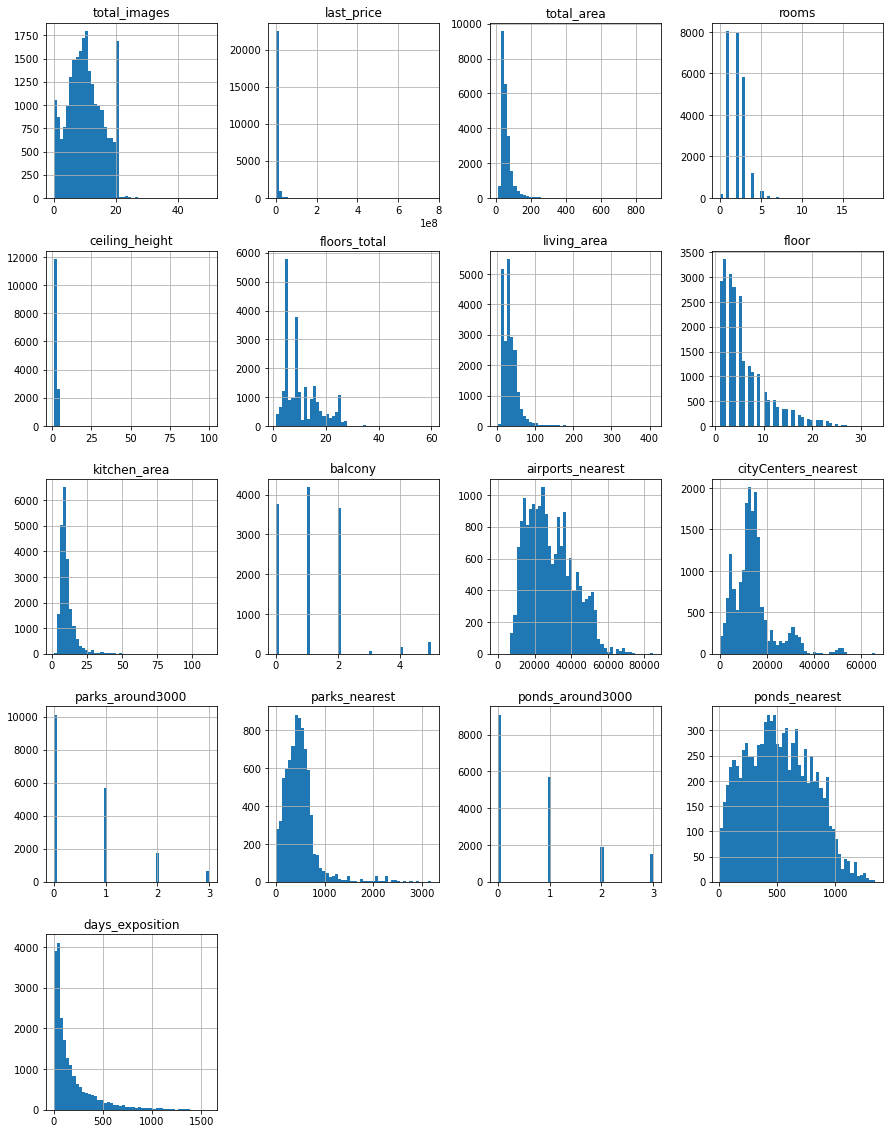

In [4]:
df.hist(figsize=(15, 20), bins=50);

### 2. Предобработка данных.

#### 2.1. Поиск и анализ пропущенных значений в столбцах.

#### Количесвто пропущенных значений для каждого столбца:

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

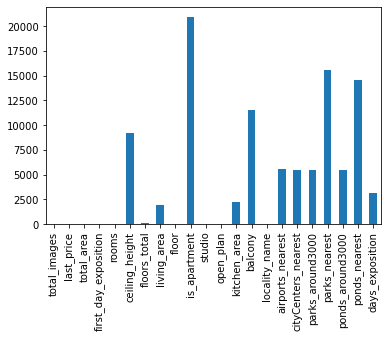

In [6]:
df.isna().sum().plot(kind='bar')
plt.show()

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

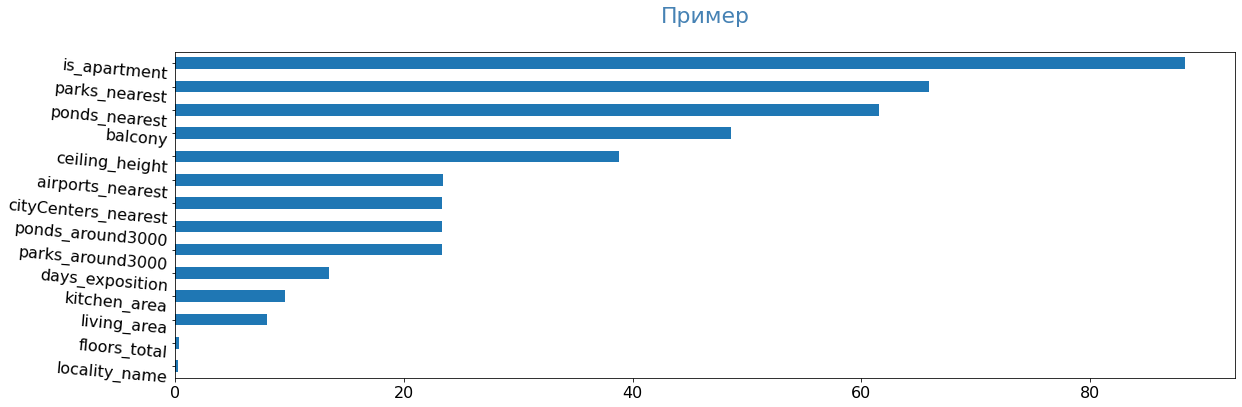

In [8]:
pass_value_barh(df)

#### Больше всего пропусков в столбце `is_apartment`, заменить логически эти пропуски не получится, необходимо сообщить коллегам о проблеме.

#### Некотрые пропуски возникают из-за невнимательности людей, другие могут "потеряться" при выгрузке данных, а третьи - могут просто не заполнить. Примрерами столбцов, где отсутвие значения может являться отсутвие значения по факту: `balcony` (балкона в кваритире), `parks_around3000` (парка в радиусе 3 км. нет), `ponds_around3000` (водоемов в радиусе 3 км. нет), `airports_nearest` (в городе нет аэропорта). Заменим пропуски в этих столбцах на 0:

In [9]:
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [10]:
df[['balcony', 'parks_around3000', 'ponds_around3000', 'airports_nearest']].fillna(value=0, inplace=True)

#### Пропуски в столбце `ceiling_height` заменим на медианное значение по городу. Используем именно медианное значение, т.к. иногда встречаются квартиры с очень высокими потолками, например, в старых домах Санкт-Петербурга.

In [11]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['ceiling_height'].isna()), 'ceiling_height'] =\
    df.loc[(df['locality_name'] == i), 'ceiling_height'].median()

#### Пропуски в столбце `ponds_nearest` заменим на среднее значение по городу. Города застроены довольно плотно, поэтому водоемы находятся примерно на одинаковом расстояние от каждого дома.

In [12]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['ponds_nearest'].isna()), 'ponds_nearest'] =\
    df.loc[(df['locality_name'] == i), 'ponds_nearest'].mean()

#### По такому же принципу заполним пропуски в столбце `parks_nearest`:

In [13]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['parks_nearest'].isna()), 'parks_nearest'] =\
    df.loc[(df['locality_name'] == i), 'parks_nearest'].mean()

 #### Изучим распределение пропусков по городам:

In [14]:
(df[df['cityCenters_nearest'].isna()].value_counts('locality_name', normalize=True) * 100).head(20)

locality_name
посёлок Мурино             9.471965
Всеволожск                 7.221920
Гатчина                    5.570677
деревня Кудрово            5.425513
Выборг                     4.300490
Кудрово                    3.139176
деревня Новое Девяткино    2.612956
Сертолово                  2.576665
Кириши                     2.268191
Сланцы                     2.032299
Волхов                     2.014154
Тосно                      1.887135
Кингисепп                  1.887135
Никольское                 1.687534
Коммунар                   1.614952
Сосновый Бор               1.578661
Кировск                    1.524224
Отрадное                   1.451642
посёлок Бугры              1.252041
Приозерск                  1.197605
dtype: float64

#### Кол-во пропусков почти не превышает 10%, значит, на дальнейший результат они скажутся несильно.

#### Можно заметить, что кол-во пропусков совпадает с кол-ом записей, это говорит о том, что даннын не заносили намеренно (в населенном пунктке аэропорта нет). Единсвенный населенный пункт, где пропусков быть не должно - Санкт-Петербург, по этому городу пропуски можно заменить медианным значением:

In [15]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['airports_nearest'].isna()), 'airports_nearest'] =\
    df.loc[(df['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'].median()

#### 2.2. Рассмотрим тип данных в каждом столбце:

In [16]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

#### Некорректный тип данных имеют следующие столбцы:
* `floors_total`- *всего этажей в доме*. Меняем тип float64 на int64, т.к. количество этажей в доме всегдя целое число.
* `is_apartment`- *апартаменты*. Меняем тип object на bool. Квартира либо является апартоментами (True), либо нет (False).
* `balcony`- *число балконов*. Меняем тип float64 на int64, количество баолконов всегда целое число.
* `parks_around3000` - *число парков в радиусе 3 км*. Меняем тип float64 на int64, количесвто парков может быть только целым числом.
* `ponds_around3000` - *число водоёмов в радиусе 3 км*. Меняем тип float64 на int64, количесвто водоёмов может быть только целым числом.
* `days_exposition`- *сколько дней было размещено объявление (от публикации до снятия)*. Меняем тип float64 на int64, будем считать только целые дни.
* `last_price`- *цена на момент снятия с публикации*. Меняем тип float64 на int64.

#### Изменим тип данных в этих столбцах:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23543 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [18]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = np.int64(df['balcony'])
df['parks_around3000'] = np.int64(df['parks_around3000'])
df['ponds_around3000'] = np.int64(df['ponds_around3000'])
df['last_price'] = np.int64(df['last_price'])

df['days_exposition'] = df['days_exposition'].fillna(-1)
df['days_exposition'] = df['days_exposition'].astype('int')

df['floors_total'] = df['floors_total'].fillna(-1)
df['floors_total'] = df['floors_total'].astype('int')

#### 2.3. Изучим названия городов в столбце `locality_name` и, при необходимости, устраним неявные дубликаты.

In [19]:
df['locality_name'] = df['locality_name'].str.lower() # приводим все названия к нижнему регистру
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # заменяем "ё" на "е" в названиях
df['locality_name'] = df['locality_name'].str.replace('поселок', '')
df['locality_name'] = df['locality_name'].replace('городской', '')
df['locality_name'] = df['locality_name'].replace('деревня', '')
df['locality_name'] = df['locality_name'].replace('городского типа', '')
df['locality_name'] = df['locality_name'].replace('село', '')
df['locality_name'] = df['locality_name'].replace('садоводческое некоммерческое товарищество', '')
df['locality_name'] = df['locality_name'].replace('станции', '')
df['locality_name'] = df['locality_name'].replace('при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace(' ', '')
df['locality_name'].unique() 

array(['санкт-петербург', 'шушары', 'городскойянино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревнякудрово', 'коммунар', 'колпино',
       'городскоготипакрасныйбор', 'гатчина', 'деревняфедоровское',
       'выборг', 'кронштадт', 'кировск', 'деревняновоедевяткино',
       'металлострой', 'городскоготипалебяжье', 'городскоготипасиверский',
       'молодцово', 'городскоготипакузьмоловский',
       'садовоетовариществоноваяропша', 'павловск', 'деревняпикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'деревнякуттузи', 'аннино', 'городскоготипаефимовский', 'плодовое',
       'деревнязаклинье', 'торковичи', 'первомайское', 'красноесело',
       'понтонный', 'сясьстрой', 'деревнястарая', 'деревнялесколово',
       'новыйсвет', 'сланцы', 'селопутилово', 'ивангород', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновыйбор', 'деревняоржицы',
       'деревнякальтино', 'кудрово', 'романовка', 'бугры'

#### 2.4. Найдем и устраним редкие и выбивающиеся значения.

#### Рассмторим столбец `ceiling_height`, *высота потолков (м)*:

In [20]:
df['ceiling_height'].unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,     nan,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,
         2.71 ,   4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,
         3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,
        13.85 ,   2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,
         2.66 ,   2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,
         3.11 ,   3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,
         3.12 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,
         2.79 ,   2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,
         2.83 ,   4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,
         3.18 ,   3.35 ,   2.3  ,   3.57 ,   2.48 ,   2.515,   2.62 ,
         2.82 ,   2.65 ,   3.98 ,   3.83 ,  27.   ,   3.52 ,   3.95 ,
         3.75 ,   2.

#### В столбце некоторые значения указаны неккоректно, например, 24.0. Руководствуясь здравым смыслом, можно предположить, что высота потолков должна быть не выше 5 м. Скорректируем значения и оставим в таблице данные о тех квартирах, где высота потолка не больше 6 м.:

In [21]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] / 10

In [22]:
df = df.query("ceiling_height < 6")

#### Рассмторим столбец `rooms` (*число комнат*):

In [23]:
df['rooms'].value_counts()

1     7999
2     7870
3     5778
4     1174
5      326
0      195
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [24]:
df = df.query("rooms < 8")

#### Удалим записи, в которых кол-во комнат больше 7, таких квартир очень маленькое число, будем считать их редкими выбивающимся значениями.

#### Рассмторим столбец `days_exposition` (*сколько дней было размещено объявление (от публикации до снятия)*):

<AxesSubplot:>

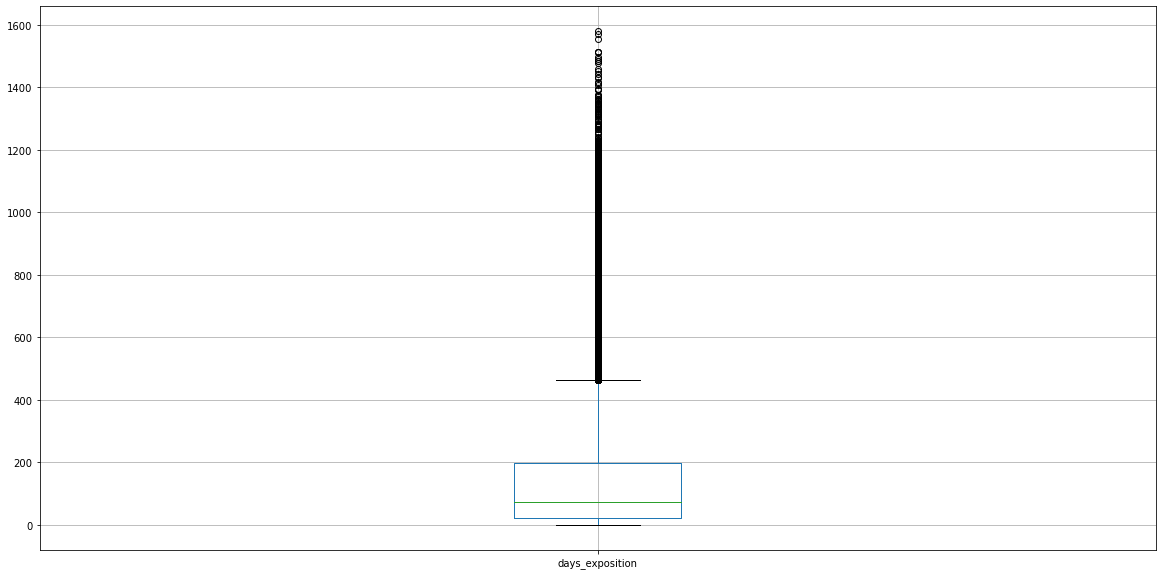

In [25]:
df.boxplot('days_exposition', figsize=(20,10))

#### Будем считать, что продажи квартры более 1000 дней - аномальное значение, избавимся от таких значений:

<AxesSubplot:>

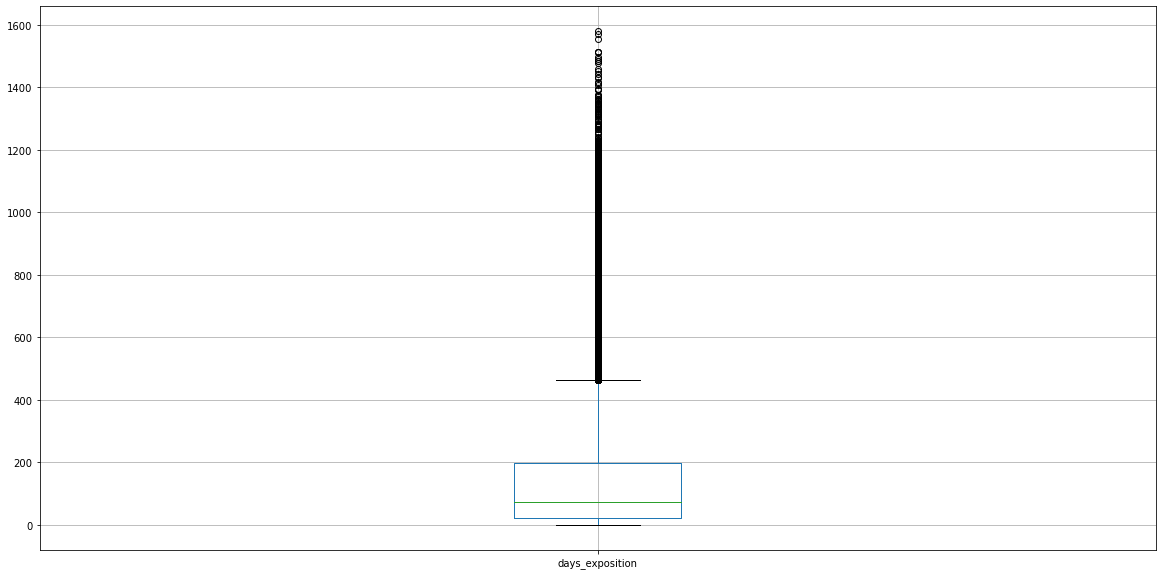

In [26]:
df.boxplot('days_exposition', figsize=(20,10))

In [27]:
df['days_exposition'] = df['days_exposition'].fillna(0)
df = df.query("days_exposition < 1000")

#### Изучим столбец `total_area`:

<AxesSubplot:>

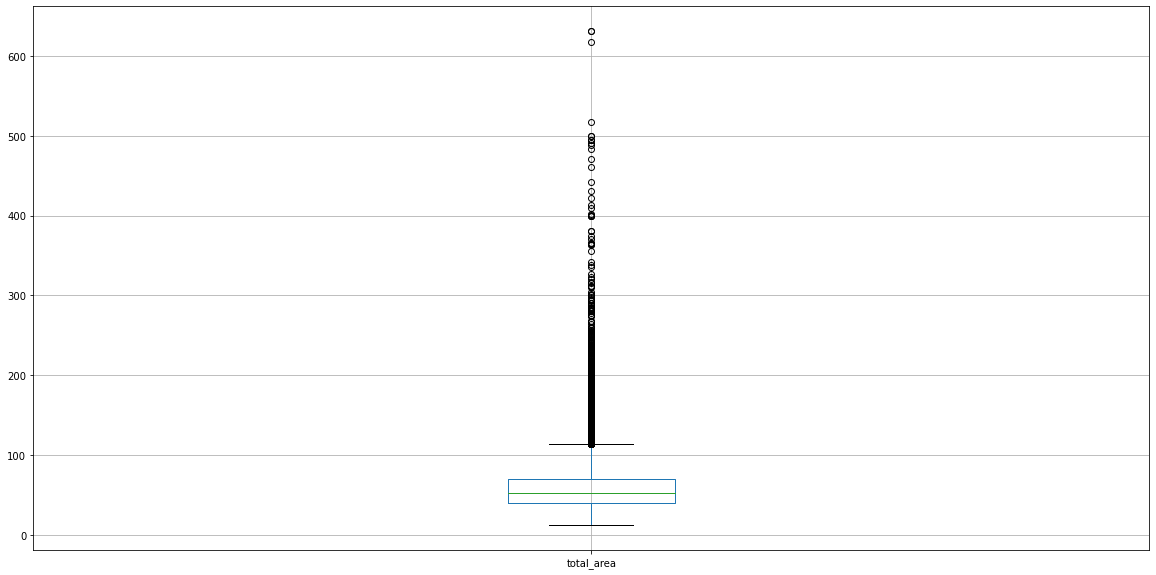

In [28]:
df.boxplot('total_area', figsize=(20,10))

#### "Выбросами" можно считать значения бльше 400, избавимся от таких значений:

In [29]:
df['total_area'] = df['total_area'].fillna(0)
df = df.query("total_area < 400")

#### Рассмотрим столбец `kitchen_area`:

<AxesSubplot:>

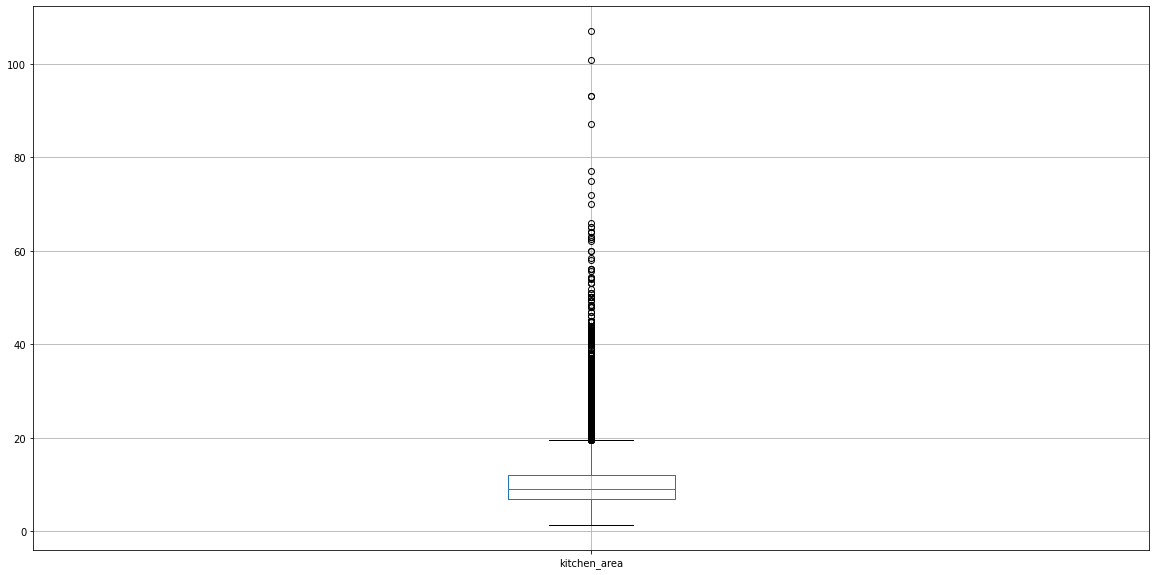

In [30]:
df.boxplot('kitchen_area', figsize=(20,10))

#### Площадь кухни находится в пределах от 5 до 20 м²:

In [31]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df = df.query("kitchen_area < 60")

#### Столбец `floors_total`:

In [32]:
df['floors_total'].value_counts()

 5     5643
 9     3719
 16    1364
 12    1350
 4     1157
 10    1151
 25    1066
 6      872
 17     824
 3      636
 7      570
 14     551
 18     501
 24     458
 8      373
 15     360
 2      357
 23     340
 19     333
 22     282
 20     266
 13     221
 11     196
 27     163
 21     151
 26     124
-1       82
 35      24
 1       23
 28      21
 36       3
 34       1
 60       1
 29       1
 33       1
 52       1
 37       1
Name: floors_total, dtype: int64

#### Аномальными этажами можно назвать этажи выше 28 - 29, 37, 52 и 60, таких всего по одному значению.Удалим их:

In [33]:
df = df.query("floors_total not in [60, 29, 52, 37]")

#### И крайний столбец - `last_price`:

In [34]:
df['last_price'].describe()

count    2.318300e+04
mean     6.288597e+06
std      7.733131e+06
min      1.219000e+04
25%      3.435000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

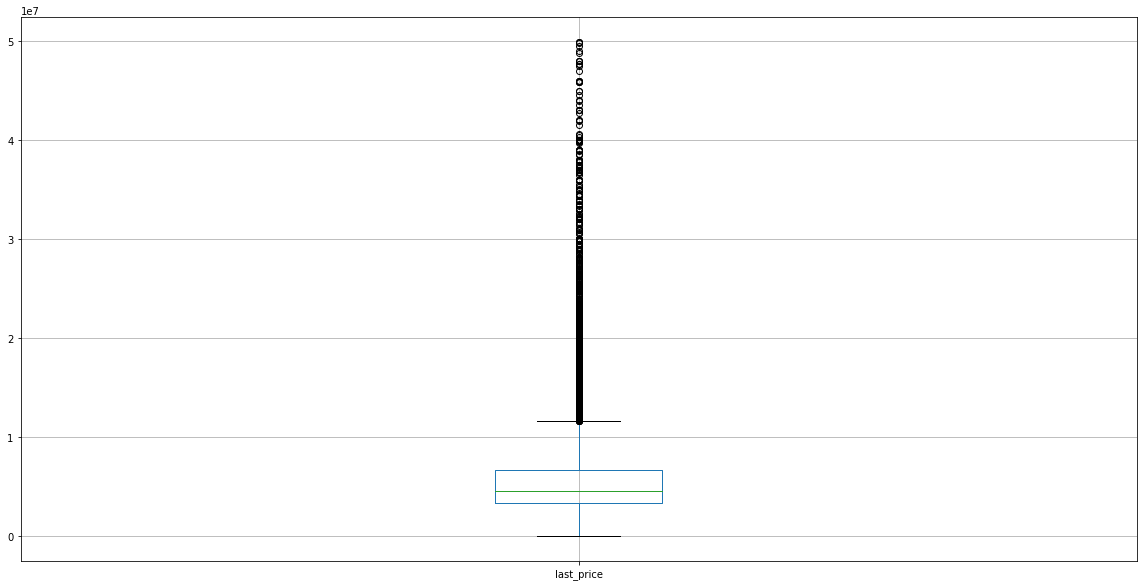

In [35]:
table_price = df[df['last_price'] < 0.5 * 10**8]
table_price.boxplot('last_price', figsize=(20,10))

#### Будем считать квартиры, дороже 50.000.000 млн. рублей - аномально дорогими, т.к. они выходят за межквартильный размах.

In [36]:
df['last_price'] = df['last_price'].fillna(0)
df = df.query("last_price < 50 * 10**7")

#### Рассмотрим столбец `living_area`:

<AxesSubplot:>

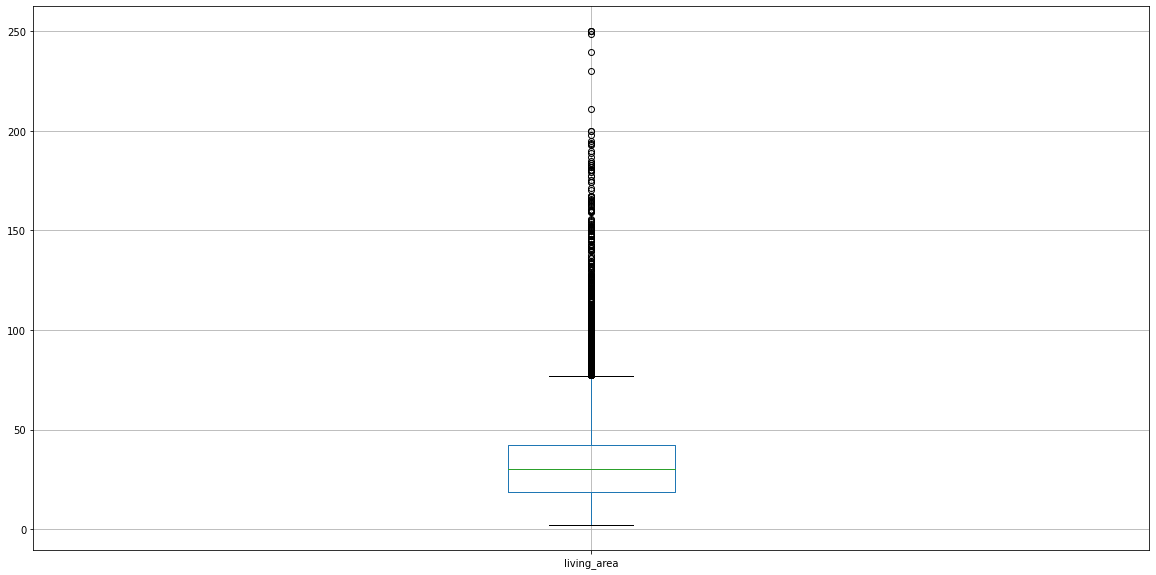

In [37]:
df.boxplot('living_area', figsize=(20,10))

#### Аномальными можно считать значение больше 200, удалим их:

In [38]:
df['living_area'] = df['living_area'].fillna(0)
df = df.query("living_area < 200")

### 3. Добавим в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра `price_square`;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) `day_publication`;
* месяц публикации объявления `month_publication`;
* год публикации объявления `year_publication`;
* тип этажа квартиры (значения — «первый», «последний», «другой») `floor_type`;
* расстояние до центра города в километрах `cityCenters_nearest_km`.

In [39]:
df['price_square'] = df['last_price'] / df['total_area']

In [40]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['day_publication'] = df['first_day_exposition'].dt.weekday 

In [41]:
df['month_publication'] = df['first_day_exposition'].dt.month

In [42]:
df['year_publication'] = df['first_day_exposition'].dt.year

In [43]:
def type_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        elif row['floor'] <= 0:
            return 'тип этажа указан некорректно'
        else:
            return 'другой'
    except:
        return 'ошибка данных'

In [44]:
df['floor_type'] = df.apply(type_floor, axis=1)

In [45]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(-1)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')

### 4. Исследовательский анализ данных

#### 4.1. Построим отдельные гистограммы для каждого из параметров: 
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

#### Больше всего квартир с общей площадью примерно 50 м².

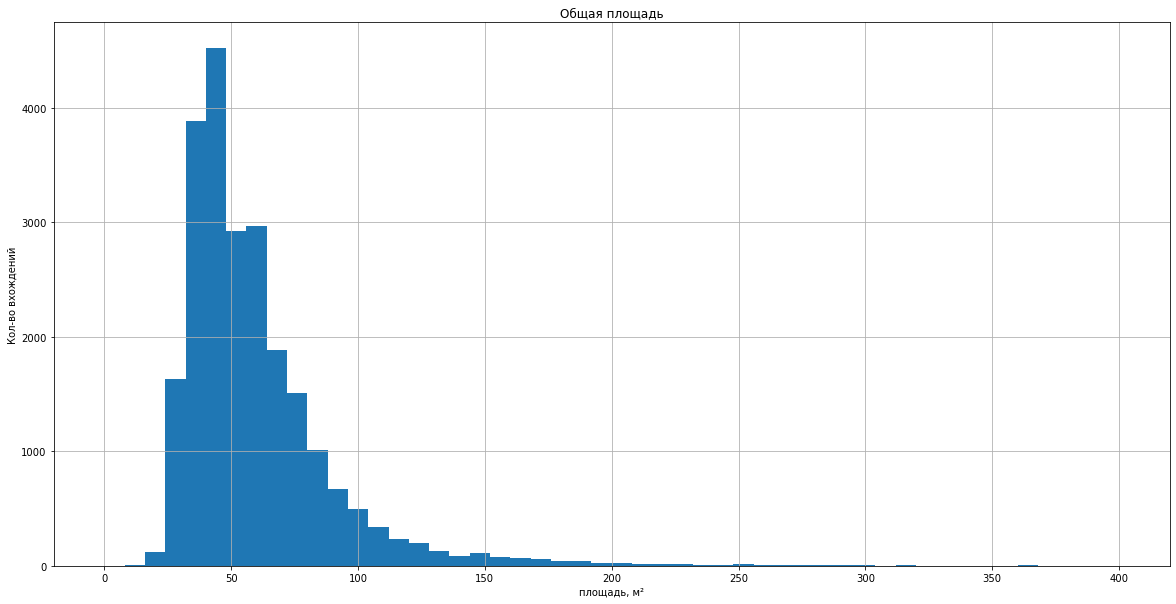

In [46]:
df['total_area'].hist(bins=50, figsize=(20,10), range=(0, 400))
plt.title('Общая площадь')
plt.xlabel('площадь, м²')
plt.ylabel('Кол-во вхождений');

#### Чаще всего жилая площадь в квартире составляет порядка 25 м².

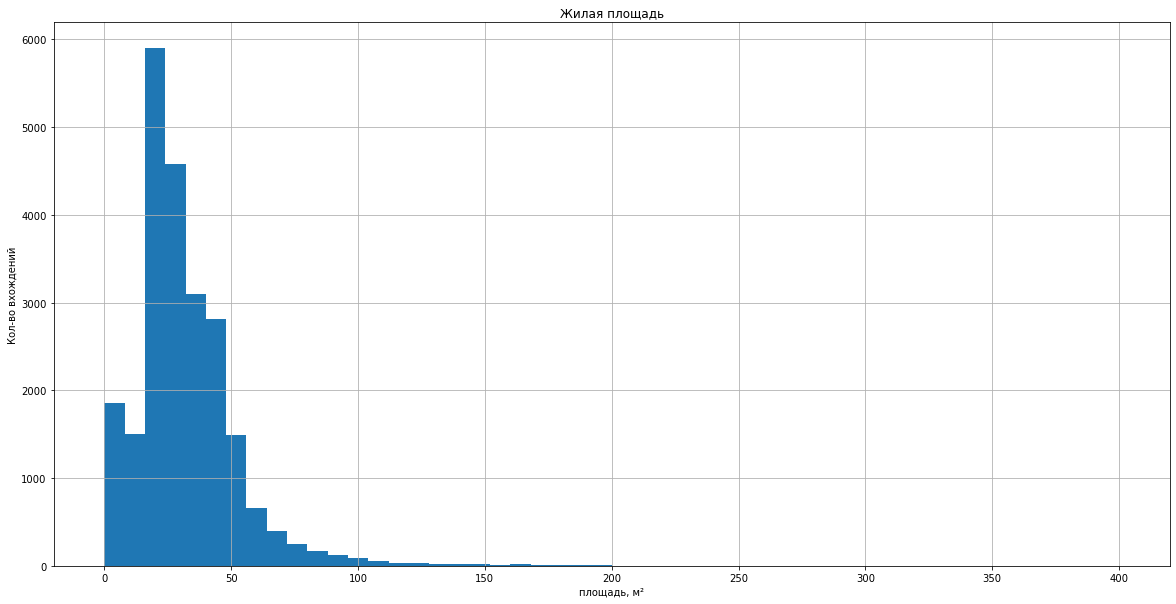

In [47]:
df['living_area'].hist(bins=50, figsize=(20,10), range=(0, 400))
plt.title('Жилая площадь')
plt.xlabel('площадь, м²')
plt.ylabel('Кол-во вхождений');

#### Площадь кухни в срдеднем - 10 м².

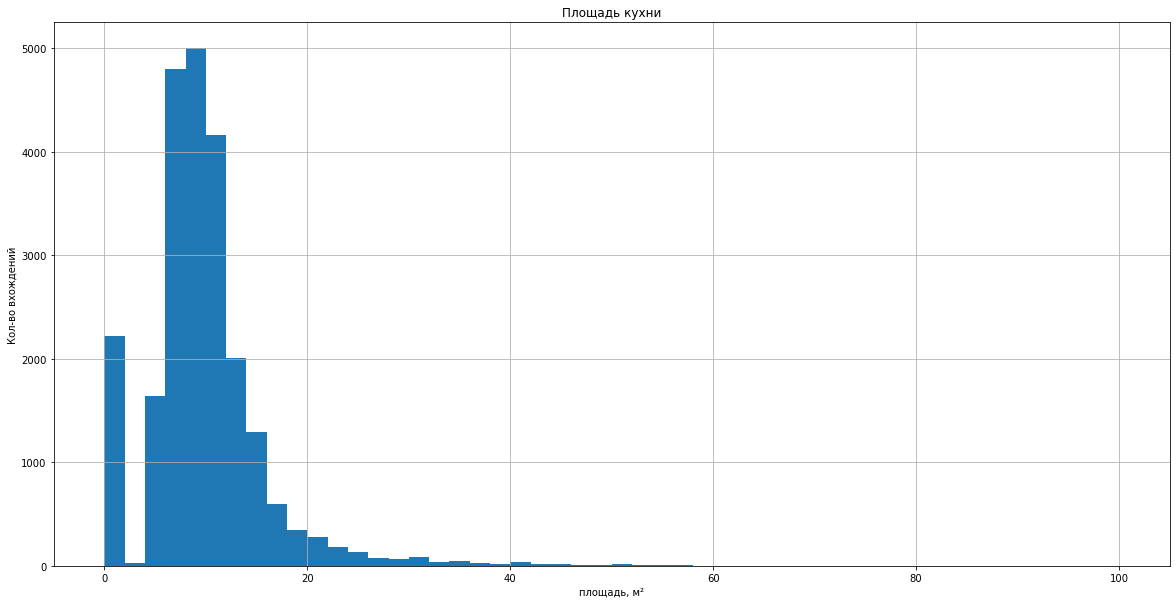

In [48]:
df['kitchen_area'].hist(bins=50, figsize=(20,10), range=(0, 100))
plt.title('Площадь кухни')
plt.xlabel('площадь, м²')
plt.ylabel('Кол-во вхождений');

#### Цена объекта в среднем - 2.000.000 руб.

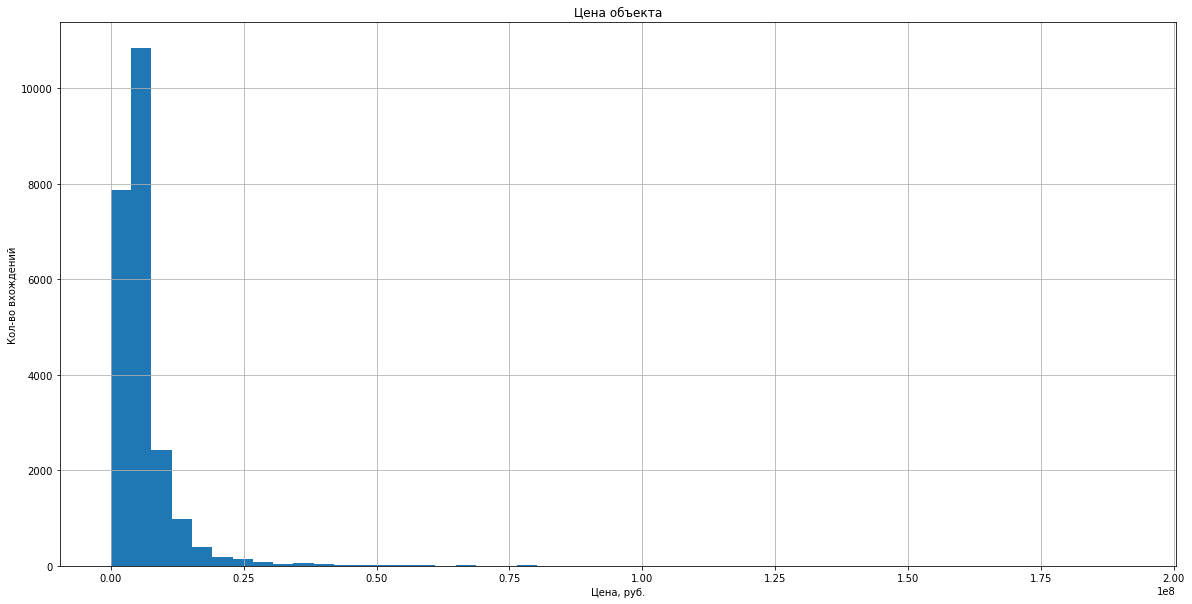

In [49]:
df.loc[df['last_price'] < 2 * 10**8, 'last_price'].hist(bins=50, figsize=(20,10))
plt.title('Цена объекта')
plt.xlabel('Цена, руб.')
plt.ylabel('Кол-во вхождений');

#### Интерквартильный размах приходится на занчения от 1-ой до 3-х комнат, значит, такое колиечтво  комнат встрачается в квартрах чаще всего.

Text(0.5, 1.0, 'Число комнат')

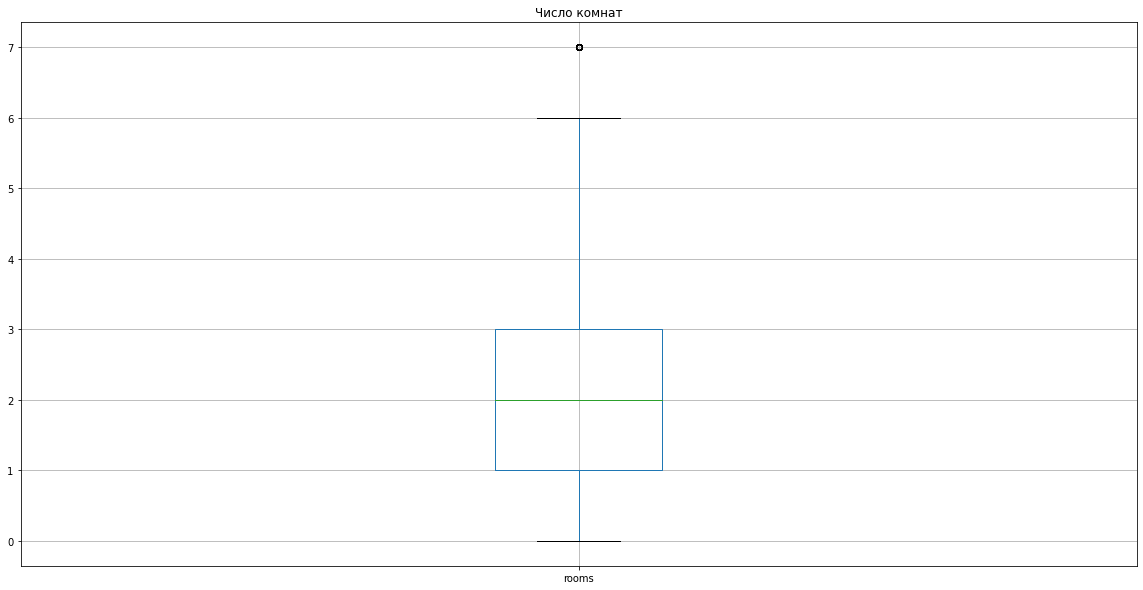

In [50]:
df.boxplot('rooms', figsize=(20,10))
plt.title('Число комнат')

#### Больше всего квартир с высотой потолков примерно 2,8 м.

Text(0.5, 1.0, 'Высота потолков')

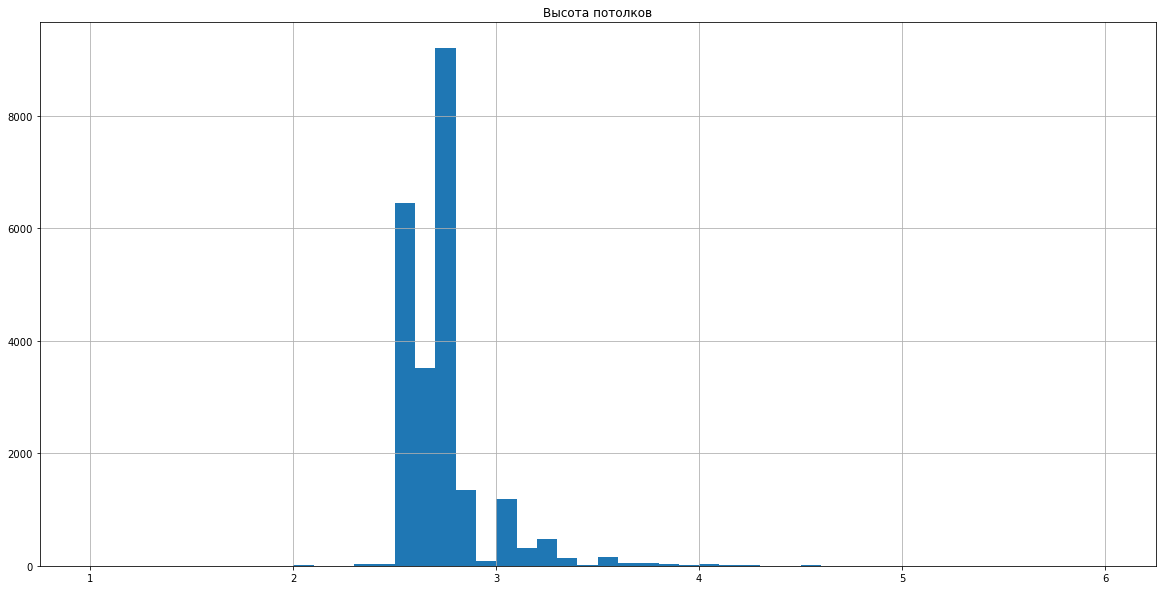

In [51]:
df['ceiling_height'].hist(bins=50, figsize=(20,10), range=(1,6))
plt.title('Высота потолков')

#### Из гистограммы видно, что большенство квартир располагаются на нижних этажах (с 1-го по 10-й).

Text(0.5, 1.0, 'Этаж')

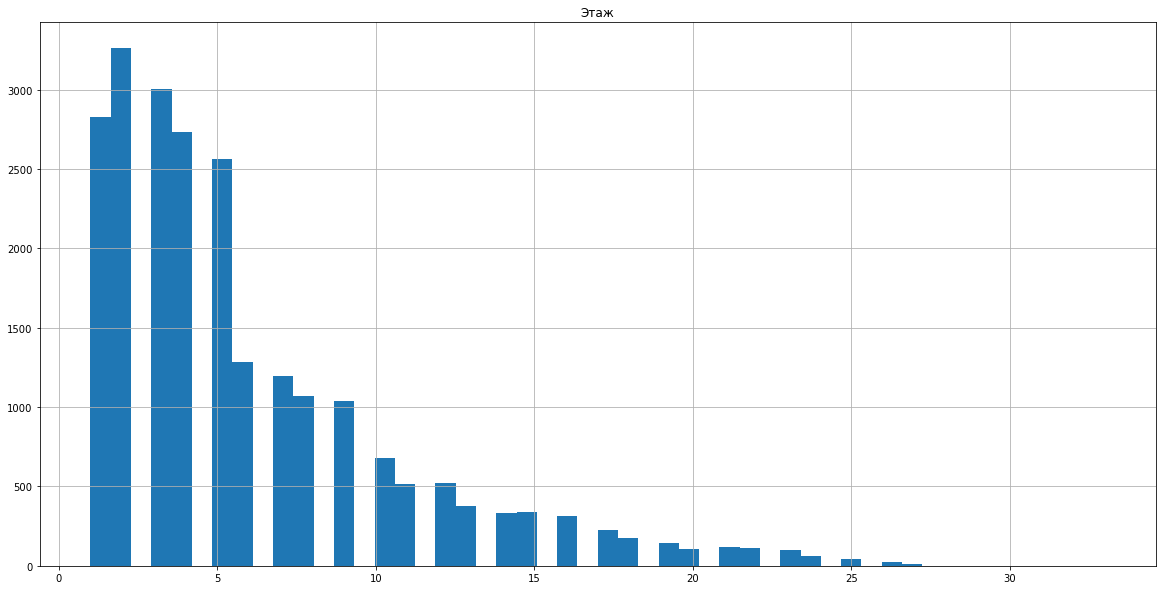

In [52]:
df['floor'].hist(bins=50, figsize=(20,10))
plt.title('Этаж')

#### Больше всего квартир НЕ на крайних этажах, это логично, т.к. таких квартир априори в разы больше. Однако, по гистограмме можно сделать вывод, что выбирая квартиру на первом или последним этаже, люди чаще всего склоняются ко второму варианту.

Text(0.5, 1.0, 'Тип этажа квартиры')

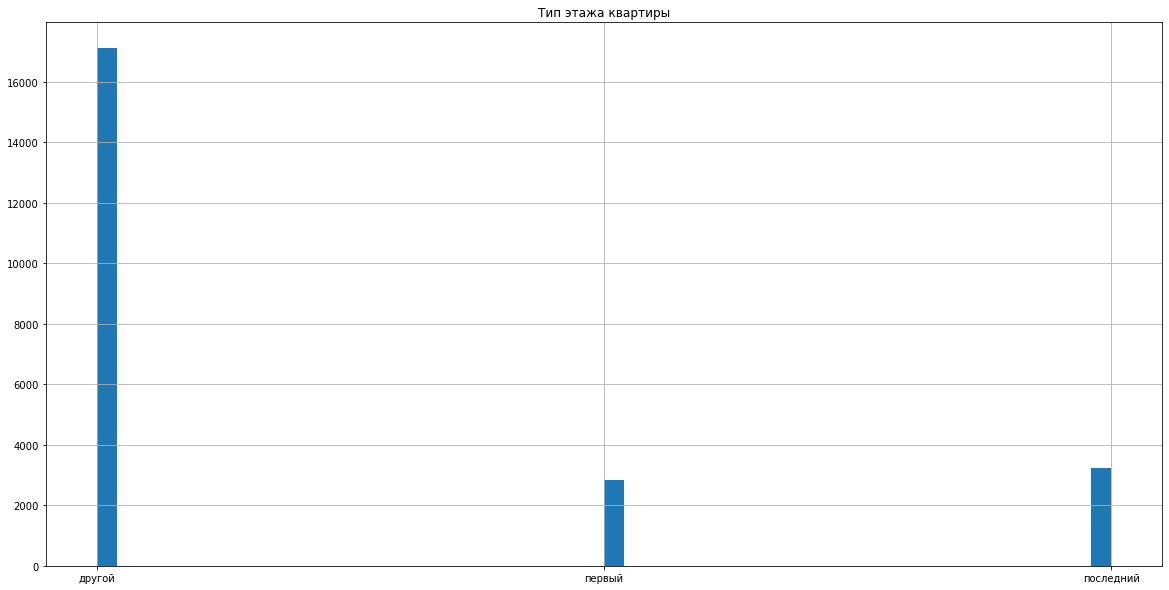

In [53]:
df['floor_type'].hist(bins=50, figsize=(20,10))
plt.title('Тип этажа квартиры')

#### Больше всего в Санкт-Петербурге и Ленинградской области пятиэтажных и девятиэтажных домов.

Text(0.5, 1.0, 'Общее количество этажей в доме')

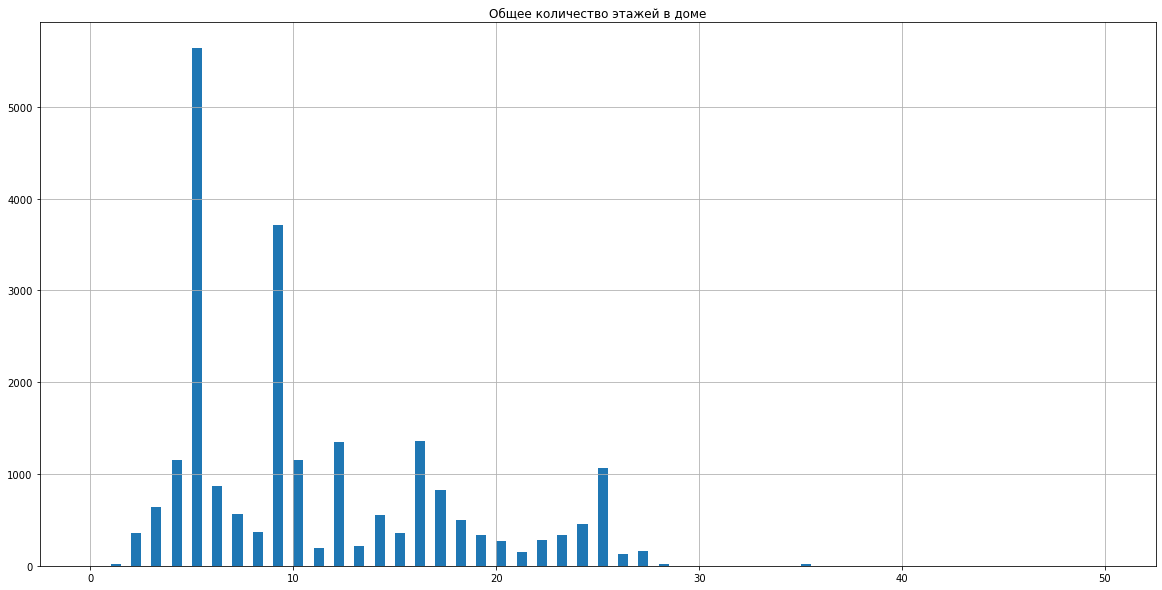

In [54]:
df['floors_total'].hist(bins=100, figsize=(20,10), range=(0, 50))
plt.title('Общее количество этажей в доме')

#### Большенство квартир находятся от центра города на расстояние 12.000 м. (12 км.).

Text(0.5, 1.0, 'Расстояние до центра города (м)')

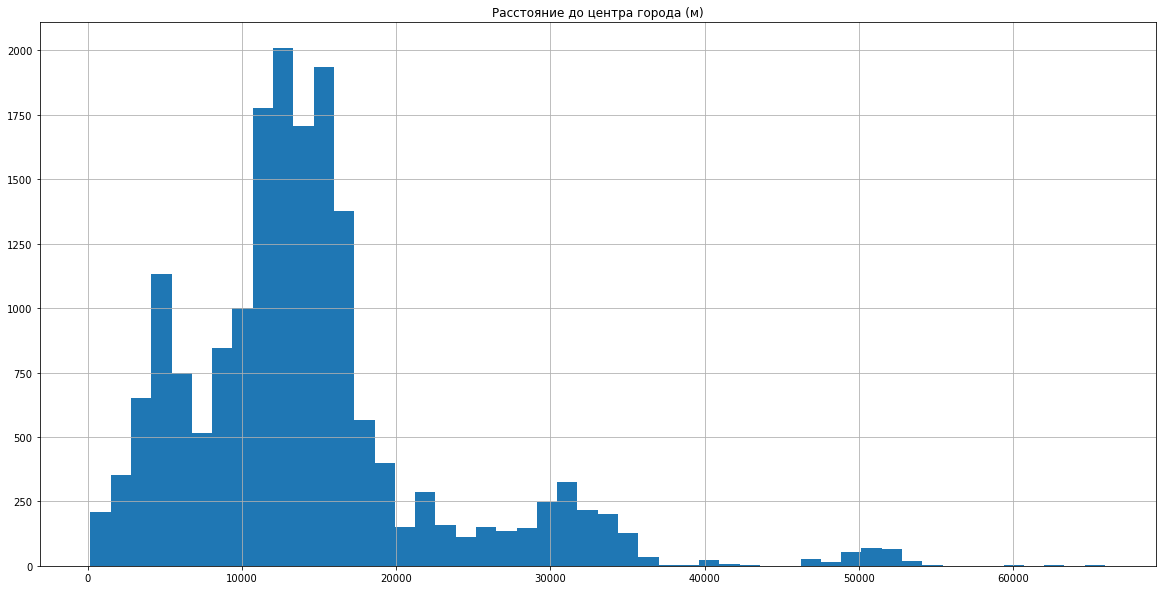

In [55]:
df['cityCenters_nearest'].hist(bins=50, figsize=(20,10))
plt.title('Расстояние до центра города (м)')

#### Большпя часть квартир находятся на расстоянии 20.000 м. (20 км.) от ближайшего аэропорта.

Text(0.5, 1.0, 'Расстояние до ближайшего аэропорта в метрах (м)')

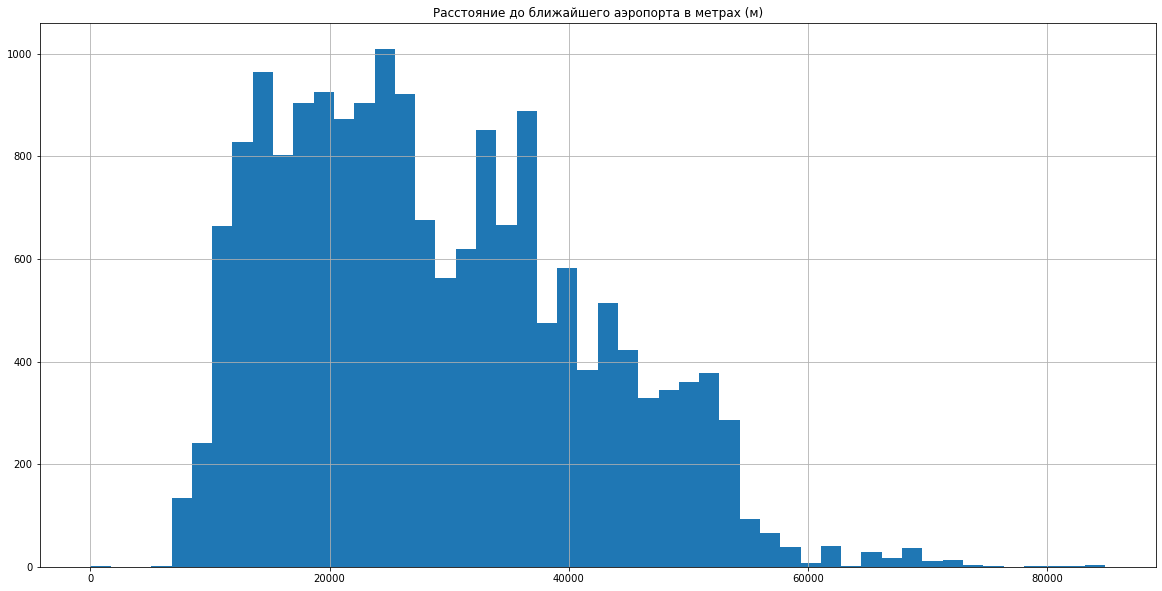

In [56]:
df['airports_nearest'].hist(bins=50, figsize=(20,10))
plt.title('Расстояние до ближайшего аэропорта в метрах (м)')

#### Парки достаточно близко находятся к большенству квартир - всего в пятиста метрах.

Text(0.5, 1.0, 'расстояние до ближайшего парка (м)')

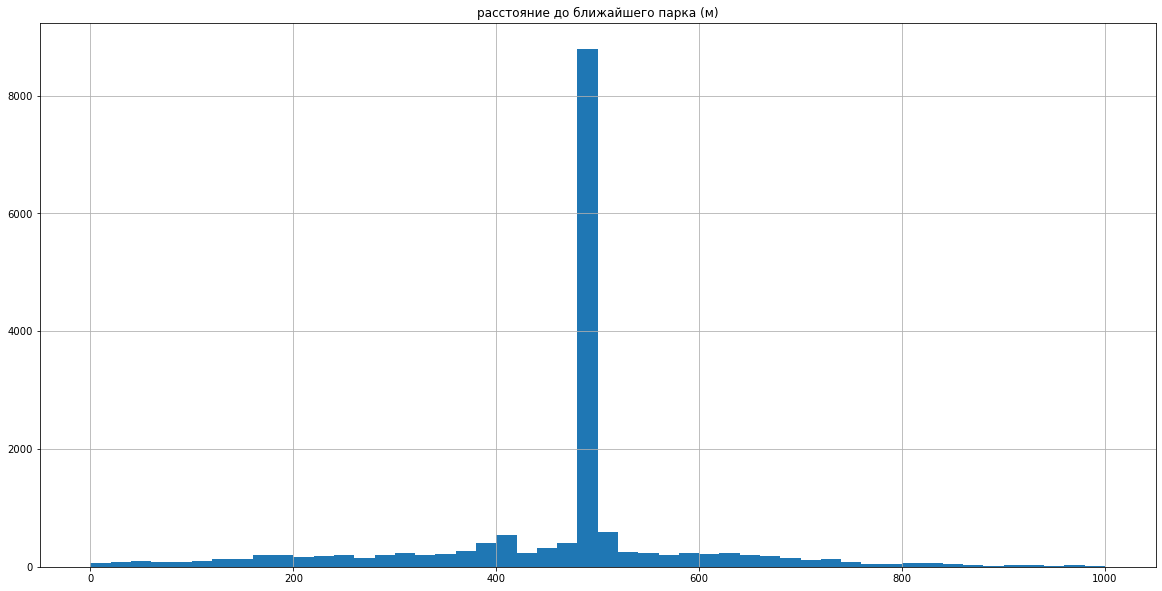

In [57]:
df['parks_nearest'].hist(bins=50, figsize=(20,10), range=(0, 1000))
plt.title('расстояние до ближайшего парка (м)')

#### К концу 2017 года количество публикаций сильно увеличилось, а к лету 2018 резко упало.

Text(0.5, 1.0, 'Год и месяц публикации объявления')

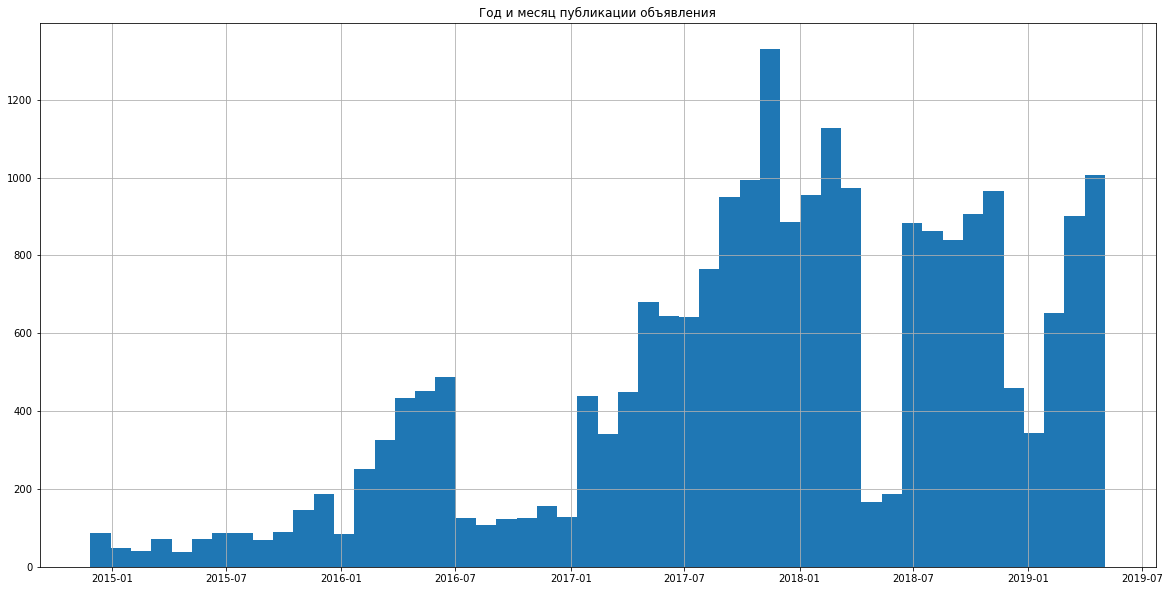

In [58]:
df['first_day_exposition'].hist(bins=50, figsize=(20,10))
plt.title('Год и месяц публикации объявления')

#### Рассмторим отдельно день и мксяц публикации, выясним, если какая-то свзяь между этими параметрами и продажей кваритры:

Text(0.5, 1.0, 'день публикации объявления')

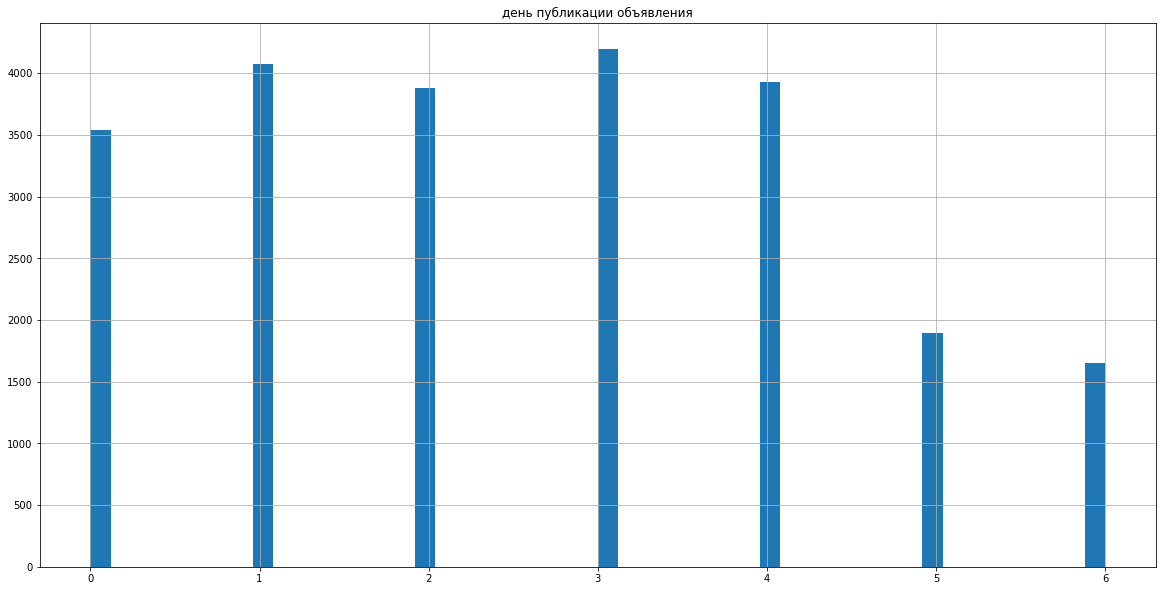

In [59]:
df['day_publication'].hist(bins=50, figsize=(20,10))
plt.title('день публикации объявления')

#### Лучше всего продаются квартиры, объявления которых было опубликовано в будние дни, на выходных заметен резкий спад.

Text(0.5, 1.0, 'месяц публикации объявления')

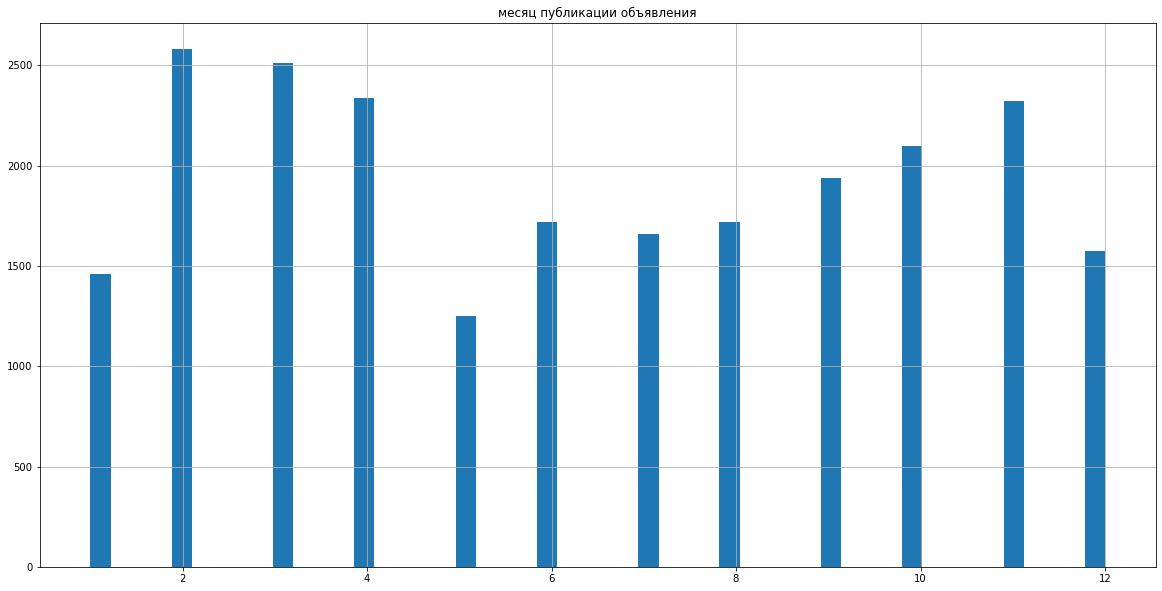

In [60]:
df['month_publication'].hist(bins=50, figsize=(20,10))
plt.title('месяц публикации объявления')

#### Февраль, Март, Апрель, Октябрь и Ноябрь показывают наилучшие показатели по продажи квартир. Риаэлторам по недвижимости следует активнее искать клиентов, т.к. спрос на квартиры в эти месяцы самый высокий.

#### 4.2. Посмотрим, как быстро продавались квартиры.

Text(0.5, 1.0, 'сколько дней было размещено объявление (от публикации до снятия)')

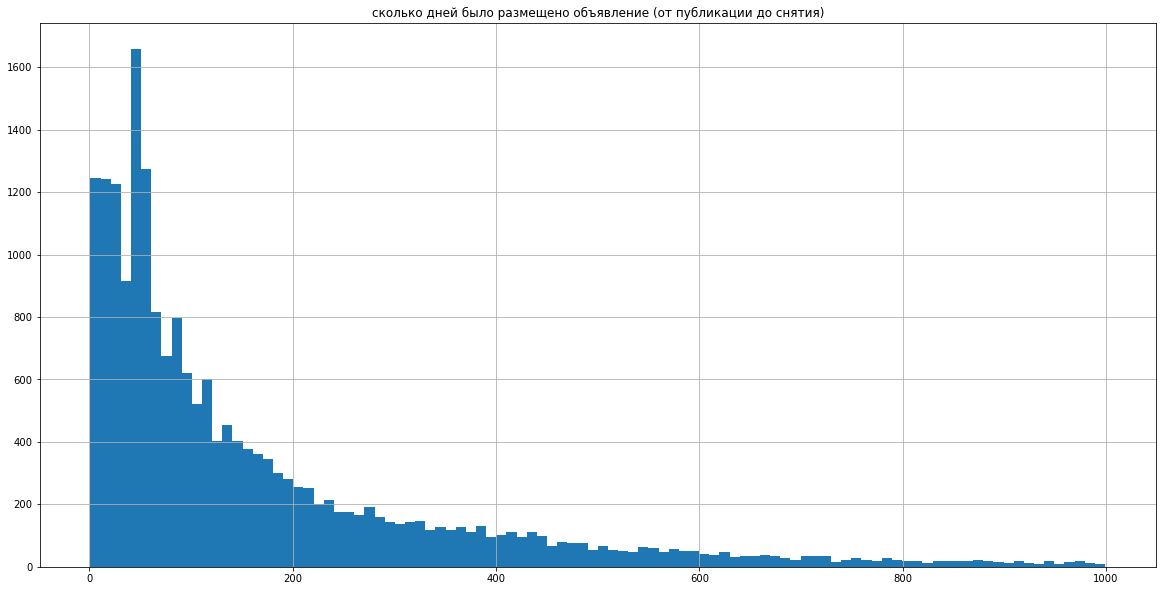

In [61]:
df = df.query('days_exposition > 0')
df['days_exposition'].hist(bins=100, figsize=(20,10))
plt.title('сколько дней было размещено объявление (от публикации до снятия)')

Text(0.5, 1.0, 'сколько дней было размещено объявление (от публикации до снятия) - ящик "с усами"')

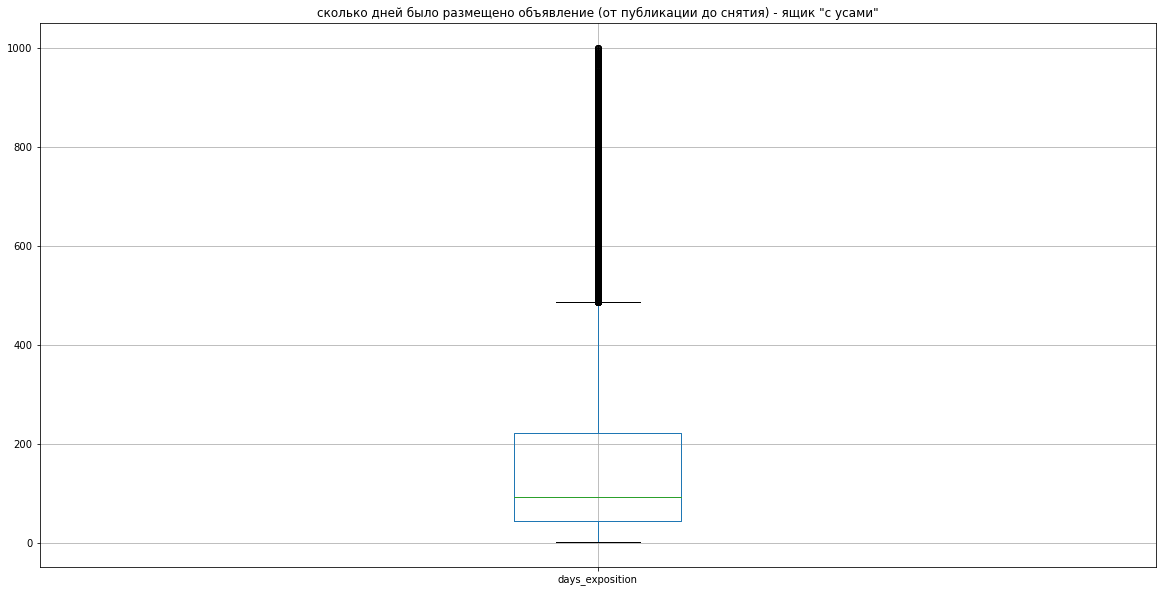

In [62]:
df.boxplot('days_exposition', figsize=(20,10))
plt.title('сколько дней было размещено объявление (от публикации до снятия) - ящик "с усами"')

#### Cреднее значение равно порядка 167 дней. 

In [63]:
df['days_exposition'].mean()

167.17934131736527

#### Медиана равна 93 дней. Значение близко к тому, что показывают нам графики.

In [64]:
df['days_exposition'].median()

93.0

In [65]:
# check
df['days_exposition'].head()

1     81
2    558
3    424
4    121
5     55
Name: days_exposition, dtype: int32

#### Можно сделать вывод, что "нормальный" срок для продажи квартиры - это 93 дня.

#### Из гистограммы видно, что чаще всего квартиры продаются за 50 дней. Интерквартильный размах нахдится в пределах значений от 45 до 232 дней - это период можно считься нормальным сроком продажи квартиры, более 232 - долгим.

#### Посмотрим как цена квартиры вляиет на срок ее продажи:

<AxesSubplot:title={'center':'Зависимость скорости продажи от цены'}, xlabel='last_price', ylabel='days_exposition'>

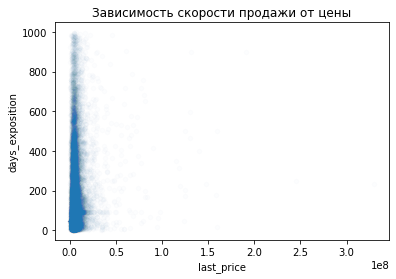

In [66]:
df.plot(x='last_price', y='days_exposition', kind='scatter', alpha=0.01, title='Зависимость скорости продажи от цены') 

In [67]:
df['last_price'].corr(df['days_exposition'])

0.10133035906439004

#### Можно сказать, что цена квартиры и срок продажи очень слабо связаны.

#### 4.3. Изучим зависимость цены от следующих факторов:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

#### Зависимость цены от общей площади квартиры есть, но несильная.

<AxesSubplot:title={'center':'Зависимость цены от общей площади квартиры'}, xlabel='last_price', ylabel='total_area'>

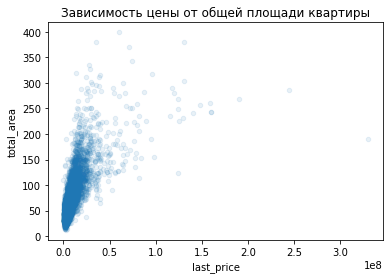

In [68]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, title='Зависимость цены от общей площади квартиры') 

In [69]:
df['last_price'].corr(df['total_area'])

0.6812290331118886

#### Цены и размер жилой площади квартиры cлабо зависят друг от друга:

<AxesSubplot:title={'center':'Зависимость цены от жилой площади квартиры'}, xlabel='last_price', ylabel='living_area'>

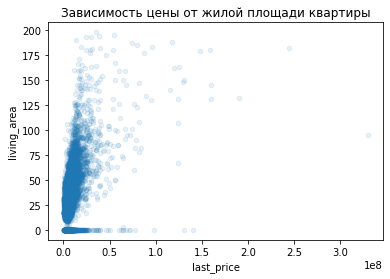

In [70]:
size = 1000*np.random.rand(50)
colors_2 = np.random.rand(50)
df.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, 
                   title='Зависимость цены от жилой площади квартиры')

In [71]:
df['last_price'].corr(df['living_area'])

0.4925115473467926

#### Пощади кухни слабо зависит от цены:

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

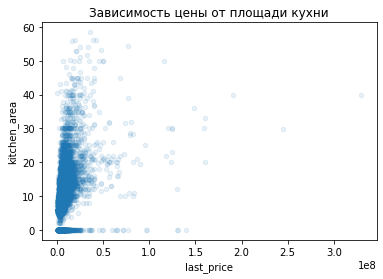

In [72]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, title='Зависимость цены от площади кухни') 

In [73]:
df['last_price'].corr(df['kitchen_area'])

0.390909606221782

#### Цены квартиры очень слабо завичит от количества комнат:

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='last_price', ylabel='rooms'>

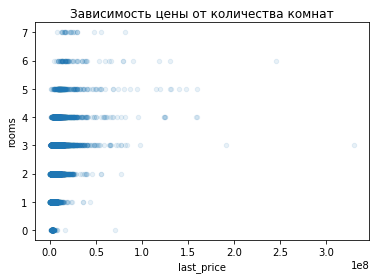

In [74]:
df.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, title='Зависимость цены от количества комнат') 

In [75]:
df['last_price'].corr(df['rooms'])

0.39326828957945714

#### Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой), есть. Самая низкая цена у квартир на первом этаже:

In [76]:
price_table = pd.pivot_table(df, index=['floor_type'], values=['last_price'])

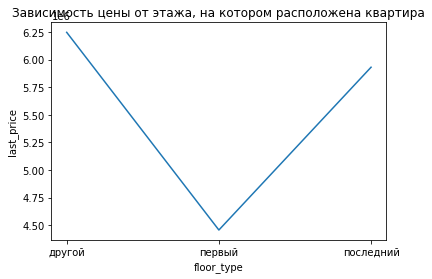

In [77]:
plt.title("Зависимость цены от этажа, на котором расположена квартира")
plt.xlabel("floor_type")
plt.ylabel("last_price")
plt.plot(price_table)

#### Зависимость цены от дня размещения. Квартиры, объявление о которых разместили в четверг (3), имели самую высокую стоимость:

In [78]:
price_table = pd.pivot_table(df, index=['day_publication'], values=['last_price'], aggfunc = 'mean')

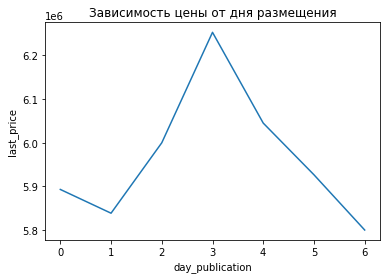

In [79]:
plt.title("Зависимость цены от дня размещения")
plt.xlabel('day_publication')
plt.ylabel('last_price') 
plt.plot(price_table)

#### Зависимость цены от месяца размещения. Квартиры, объявление о которых разместили в августе и сентябре, имели самую высокую стоимость:

In [80]:
price_table = pd.pivot_table(df, index=['month_publication'], values=['last_price'], aggfunc = 'mean')

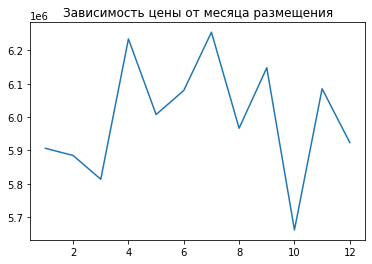

In [81]:
plt.title("Зависимость цены от месяца размещения")
plt.plot(price_table)

#### Зависимость цены от года размещения. С 2014 по 2015 год наблюдается резкий спад стоимости квартир, далее цены были почти без изменний, только к 2019 году цена чуть-чуть увеличилась:

In [82]:
price_table = pd.pivot_table(df, index=['year_publication'], values=['last_price'], aggfunc = 'mean')

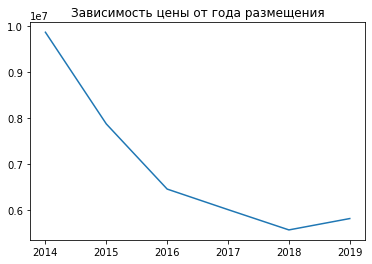

In [83]:
plt.title("Зависимость цены от года размещения")
plt.plot(price_table)

#### 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

#### 10 населённых пунктах с наибольшим числом объявлений:

In [84]:
df.value_counts('locality_name').head(10)

locality_name
санкт-петербург    13367
мурино               546
шушары               404
всеволожск           335
колпино              305
парголово            300
пушкин               297
деревнякудрово       294
гатчина              268
выборг               207
dtype: int64

#### Средняя цена за один квадратный метр среди населенных пунктов с самым большим количеством объявлений:

#### Санкт-Петербург - 112.412 руб/м²

In [85]:
df.loc[df['locality_name'] == 'санкт-петербург', 'price_square'].mean()

111516.78357657086

#### Мурино - 85.743 руб/м²

In [86]:
df.loc[df['locality_name'] == 'мурино', 'price_square'].mean()

85852.66686949044

#### Шушары - 78.010 руб/м²

In [87]:
df.loc[df['locality_name'] == 'шушары', 'price_square'].mean()

77937.12910260509

#### Всеволожск - 68.570 руб/м²

In [88]:
df.loc[df['locality_name'] == 'всеволожск', 'price_square'].mean()

68623.13948616426

#### Колпино - 74.865 руб/м²

In [89]:
df.loc[df['locality_name'] == 'колпино', 'price_square'].mean()

74700.74711665967

#### Пушкин - 102.074 руб/м²

In [90]:
df.loc[df['locality_name'] == 'пушкин', 'price_square'].mean()

101905.54587040603

#### Парголово - 89.505 руб/м²

In [91]:
df.loc[df['locality_name'] == 'парголово', 'price_square'].mean()

89405.71580755546

#### Деревня Кудрово - 92.473 руб/м²

In [92]:
df.loc[df['locality_name'] == 'деревнякудрово', 'price_square'].mean()

92421.52867093917

#### Гатчина - 67.928 руб/м²

In [93]:
df.loc[df['locality_name'] == 'гатчина', 'price_square'].mean()

67928.32699015815

#### Выборг - 57.084 руб/м²

In [94]:
df.loc[df['locality_name'] == 'выборг', 'price_square'].mean()

57055.93987723023

#### Самая высокая цена за 1 м² в Санкт-Петербурге - 112.412 руб., самая низкая в Выборге - 57.084 руб.

#### 4.5. Вычислим среднюю цену каждого киллометра от центра в Санкт-Петербурге. Проанализируем связь между ценой квартиры и расстоянием до центра города.

In [95]:
df_spb = df[df['locality_name'] == 'санкт-петербург']

In [96]:
df_spb = pd.pivot_table(df_spb, index=['cityCenters_nearest_km'], values=['last_price'], aggfunc='mean')

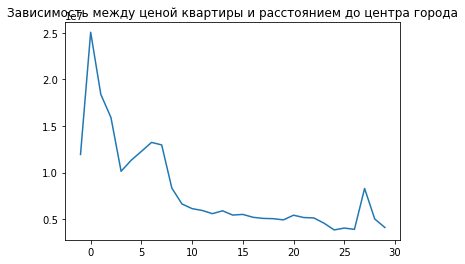

In [97]:
plt.title("Зависимость между ценой квартиры и расстоянием до центра города")
plt.plot(df_spb)

#### На нрафике видно, что c увеличением расстояния от центра, цена квартиры уменьшается.

#### Корелляция позволяет сделать вывод, что между значенями есть умеренная связь.

### 5. Общий вывод

#### Исследование показало, что больше всего квартир продают в Санкт-Петербурге, Мурино и Шушарах. В среднем цена за 1 м² в Санкт-Петербурге и Ленинградской области составляет от 57 до 112 тыс. руб., покупатели предпочитают квартиры с числом комнот от 1-ой до 3-х, со средней высотой потолков 2,8 м., с 1-го по 10-ый этаж.
#### В среднем квартиры в Санкт-Петербурге и Ленинградской области продаются за 50 дней - это считается довольно быстрой продажей.
#### За каждый киллометр ближе к центру Санкт-Петербургу покупателю придется отдать порядка 1.300.000 руб., значение корреляции показало, что цена и растояние от центра города взаимосвязаны: чем ближе к центру, тем дороже квартира. Цена квартиры  зависит от ее площади, но не так сильно, на цену могут влять такие факторы как: местоположения дома, благоустройство территории и другие удобства.